# Assingment 08

### RaviKiran Bhat
### Rubanraj RaviChandran
### Ramesh Kumar

# Exercise 3

Tasks: 


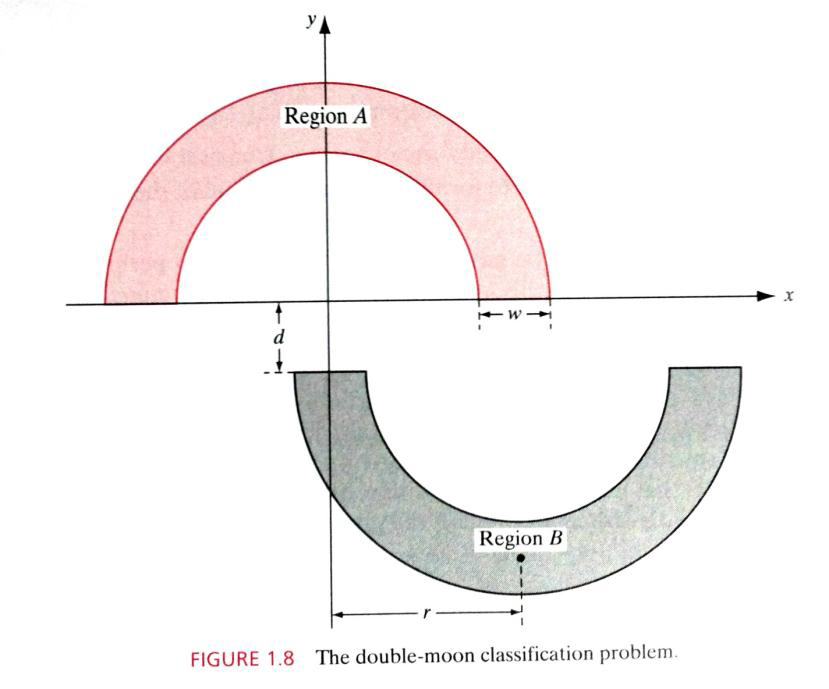

In [2]:
from IPython.display import Image
Image(filename='fig2.png')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import svm
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
class StateVectorMachine:
    
    def __init__(self,_radius,_width,_distance,_num_of_training_set,
                 _num_of_testing_set):
        self.radius = _radius
        self.width = _width
        self.distance = _distance
        self.num_of_training_set = _num_of_training_set
        self.num_of_testing_set = _num_of_testing_set
        
        
    def generate_sample(self,_class):
        random_theta = np.pi *  random.random()
        random_r = (self.width*random.random())+(self.radius-self.width)
        #Region one
        if _class is 1:
            x = random_r*np.cos(random_theta)
            y = random_r*np.sin(random_theta) 
            return [x,y,1]
        else:
            #Region two
            random_theta += np.pi
            x = random_r*np.cos(random_theta)+(self.radius-(self.width/2.0))
            y = random_r*np.sin(random_theta)-self.distance
            return [x,y,2]
        
    def get_samples(self,_flag):
        samples = np.empty((0,3))
        
        if _flag is "train":
            _no_of_samples = self.num_of_training_set
        else:
            _no_of_samples = self.num_of_testing_set
        
        """
        - generating number of samples 
        - half samples belongs to region A and 
          remaining half samples belongs to region B
        """
        for i in range(_no_of_samples):
            sample = self.generate_sample(1 if (i<_no_of_samples/2) else 2)
            samples = np.vstack([samples,sample])
        
        #returning samples and desired output
        return samples[:,0:2],samples[:,2:3]
    
    def plot(self,points,output,title):
        plt.grid(True)
        plt.title(title)
        plt.xlabel("x-->")
        plt.ylabel("y-->")
        for index,point in enumerate(points):
            if (output[index] == 1.0):
                plt.plot(point[0],point[1],'r+',label='region a')
            else:
                plt.plot(point[0],point[1],'b+',label='region b')

    
    def get_center_of_cluster(self, X, k):
        
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        return kmeans, kmeans.cluster_centers_
        
    
    def compute_variance(self, x):
        
        kmeans, mu = self.get_center_of_cluster(x, 6)
        avg_sq = np.zeros((6,2))
        count = np.zeros(6)
        variance = np.zeros((6,2))

        for i in range(len(x)):
            
            kmeans_labels = kmeans.labels_
            
            avg_sq[kmeans_labels[i]] += (x[i] - mu[kmeans_labels[i]])**2
            
            count[kmeans_labels[i]] += 1
            
        for i in range(len(avg_sq)):    
            variance[i] = avg_sq[i]/count[i]
            
        return variance, mu

# Case1: d = 1.0

variance  [[ 4.79650281  2.72560478]
 [ 4.00927424  2.44114587]
 [ 3.63001331  4.34126249]
 [ 2.77724967  3.71942127]
 [ 3.28829096  4.68145246]
 [ 2.34084249  4.21584164]]
centres  [[  6.68069396  -7.60691053]
 [ -0.33054649   6.55866184]
 [  5.96266829   3.03030725]
 [  1.36031671  -4.04477602]
 [ 12.89424687  -4.62486498]
 [ -5.77622989   3.34263568]]


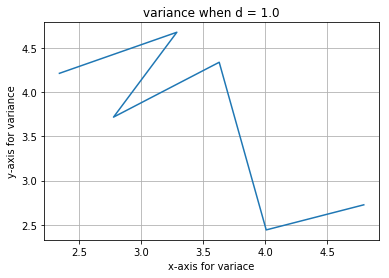

In [7]:
radius = 10.0
width = 6.0
distance = 1.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
training_input,desired_output = state_vector_machine.get_samples("train")

variance, centres = state_vector_machine.compute_variance(training_input)
print "variance ", variance
print "centres ", centres
plt.grid(True)
plt.title("variance when d = 1.0")
plt.xlabel("x-axis for variace")
plt.ylabel("y-axis for variance")
plt.plot(variance[:,0], variance[:,1])

# Case2: d = 0.0

variance  [[ 2.77724967  3.71942127]
 [ 4.00927424  2.44114587]
 [ 4.74530524  2.64531628]
 [ 3.51567634  4.58145011]
 [ 3.63001331  4.34126249]
 [ 2.34084249  4.21584164]]
centres  [[  1.36031671  -4.04477602]
 [ -0.33054649   6.55866184]
 [  6.6198177   -7.66338928]
 [ 12.80775362  -4.63845969]
 [  5.96266829   3.03030725]
 [ -5.77622989   3.34263568]]


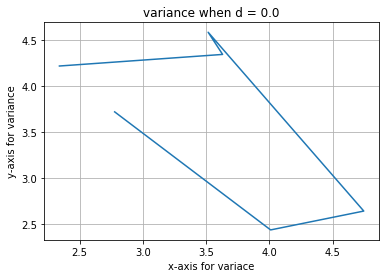

In [9]:
distance = 0.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

variance, centres = state_vector_machine.compute_variance(training_input)
print "variance ", variance
print "centres ", centres
plt.grid(True)
plt.title("variance when d = 0.0")
plt.xlabel("x-axis for variace")
plt.ylabel("y-axis for variance")
plt.plot(variance[:,0], variance[:,1])

# case3: d = -1.0

variance  [[ 4.74530524  2.64531628]
 [ 4.00927424  2.44114587]
 [ 3.63001331  4.34126249]
 [ 3.51567634  4.58145011]
 [ 2.77724967  3.71942127]
 [ 2.34084249  4.21584164]]
centres  [[  6.6198177   -7.66338928]
 [ -0.33054649   6.55866184]
 [  5.96266829   3.03030725]
 [ 12.80775362  -4.63845969]
 [  1.36031671  -4.04477602]
 [ -5.77622989   3.34263568]]


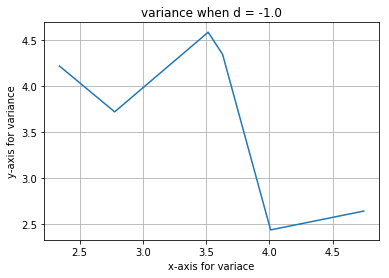

In [10]:
distance = -1.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance, centres = state_vector_machine.compute_variance(training_input)
print "variance ", variance
print "centres ", centres
plt.grid(True)
plt.title("variance when d = -1.0")
plt.xlabel("x-axis for variace")
plt.ylabel("y-axis for variance")
plt.plot(variance[:,0], variance[:,1])

# case4: d = -2.0

variance  [[ 4.47548242  2.76211924]
 [ 4.00927424  2.44114587]
 [ 3.15398319  4.58068335]
 [ 2.81593943  4.27963868]
 [ 3.63001331  4.34126249]
 [ 2.34084249  4.21584164]]
centres  [[  6.97873614  -7.58503018]
 [ -0.33054649   6.55866184]
 [ 12.97618264  -4.55303833]
 [  1.44827048  -4.23330896]
 [  5.96266829   3.03030725]
 [ -5.77622989   3.34263568]]


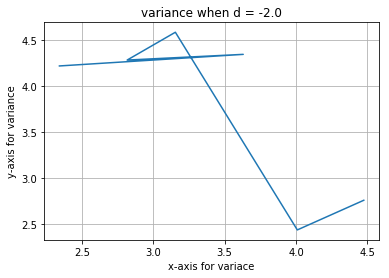

In [11]:
distance = -2.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance, centres = state_vector_machine.compute_variance(training_input)
print "variance ", variance
print "centres ", centres
plt.grid(True)
plt.title("variance when d = -2.0")
plt.xlabel("x-axis for variace")
plt.ylabel("y-axis for variance")
plt.plot(variance[:,0], variance[:,1])

# case5: d = -3.0

variance  [[ 4.00927424  2.44114587]
 [ 4.51829651  2.74789866]
 [ 3.63001331  4.34126249]
 [ 2.80691548  4.25882809]
 [ 3.15398319  4.58068335]
 [ 2.34084249  4.21584164]]
centres  [[ -0.33054649   6.55866184]
 [  6.95867274  -7.58175145]
 [  5.96266829   3.03030725]
 [  1.43603777  -4.21691025]
 [ 12.97618264  -4.55303833]
 [ -5.77622989   3.34263568]]


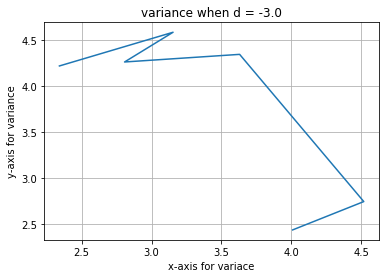

In [12]:
distance = -3.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance, centres = state_vector_machine.compute_variance(training_input)
print "variance ", variance
print "centres ", centres
plt.grid(True)
plt.title("variance when d = -3.0")
plt.xlabel("x-axis for variace")
plt.ylabel("y-axis for variance")
plt.plot(variance[:,0], variance[:,1])

# case6 d = -4.0

variance  [[ 4.00927424  2.44114587]
 [ 2.81593943  4.27963868]
 [ 3.15398319  4.58068335]
 [ 2.34084249  4.21584164]
 [ 3.63001331  4.34126249]
 [ 4.47548242  2.76211924]]
centres  [[ -0.33054649   6.55866184]
 [  1.44827048  -4.23330896]
 [ 12.97618264  -4.55303833]
 [ -5.77622989   3.34263568]
 [  5.96266829   3.03030725]
 [  6.97873614  -7.58503018]]


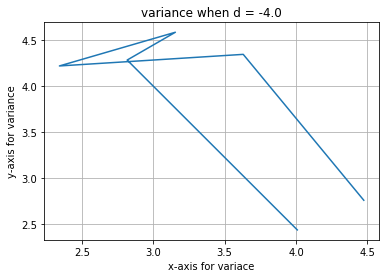

In [13]:
distance = -4.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

variance, centres = state_vector_machine.compute_variance(training_input)
print "variance ", variance
print "centres ", centres
plt.grid(True)
plt.title("variance when d = -4.0")
plt.xlabel("x-axis for variace")
plt.ylabel("y-axis for variance")
plt.plot(variance[:,0], variance[:,1])

# case7 d= -5.0

variance  [[ 4.74557327  2.64546804]
 [ 4.00927424  2.44114587]
 [ 3.51608706  4.58148081]
 [ 2.34084249  4.21584164]
 [ 3.63001331  4.34126249]
 [ 2.77724967  3.71942127]]
centres  [[  6.60344602  -7.67570813]
 [ -0.33054649   6.55866184]
 [ 12.78748725  -4.64399972]
 [ -5.77622989   3.34263568]
 [  5.96266829   3.03030725]
 [  1.36031671  -4.04477602]]


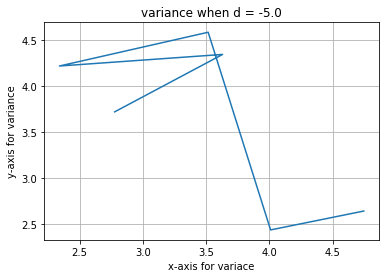

In [14]:
distance = -5.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance, centres = state_vector_machine.compute_variance(training_input)
print "variance ", variance
print "centres ", centres
plt.grid(True)
plt.title("variance when d = -5.0")
plt.xlabel("x-axis for variace")
plt.ylabel("y-axis for variance")
plt.plot(variance[:,0], variance[:,1])

# case8: d = -6.0

variance  [[ 4.79650281  2.72560478]
 [ 4.00927424  2.44114587]
 [ 3.28829096  4.68145246]
 [ 3.63001331  4.34126249]
 [ 2.77724967  3.71942127]
 [ 2.34084249  4.21584164]]
centres  [[  6.68069396  -7.60691053]
 [ -0.33054649   6.55866184]
 [ 12.89424687  -4.62486498]
 [  5.96266829   3.03030725]
 [  1.36031671  -4.04477602]
 [ -5.77622989   3.34263568]]


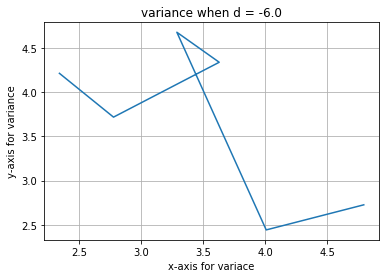

In [15]:
distance = -6.0
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)
variance, centres = state_vector_machine.compute_variance(training_input)
print "variance ", variance
print "centres ", centres
plt.grid(True)
plt.title("variance when d = -6.0")
plt.xlabel("x-axis for variace")
plt.ylabel("y-axis for variance")
plt.plot(variance[:,0], variance[:,1])

# Exercise 3
Investigate the use of back-propagation learning using a sigmoidal nonlinearity to achieve one-toone mappings, as described here:

1. F(x) = 1/x 1<=x<=100

2. F(x) = log10(x) 1<=x<=10

3. F(x) = exp(-x) 1<=x<=10

4. F(x) = sin(x) 0<=x<=pi/2

(a) Set up two sets of data, one for network training, and the other for testing.

(b) Use the training data set to compute the synaptic weights of the network, assumed to have a single hidden layer.

In [53]:
class NeuralNetwork:

    def __init__(self,
                 _no_input_neuron,
                 _hidden_config,
                 _no_output_neuron,
                 _input_data_set,
                 _desired_output,
                 _learning_rate,
                 _random_initial_weight):

        self.no_of_input_neurons = _no_input_neuron
        self._hidden_config = _hidden_config
        self.no_of_layers = len(_hidden_config)
        self.no_of_hidden_neurons = _hidden_config[0]
        self.no_of_output_neurons = _no_output_neuron

        self.input_data_set = _input_data_set
        self.desired_output = _desired_output
        
        self.learning_rate = _learning_rate
        self.random_initial_weight = _random_initial_weight
        
    def generate_weight(self,is_random,_size):
        return np.random.uniform(size=_size) if is_random else np.zeros(_size)
        
    def sigmoid (self,x): 
        return 1/(1 + np.exp(-x)) 
    
    def derivative_(self,x): 
        return x * (1 - x)
    
    def local_field(self,x,w):
        return np.dot(x,w)
    
    def error(self,y):
        return self.desired_output - y
    
    def delta(self,sigma_tic,summed_error,flag = False):
        return summed_error * sigma_tic        
#         return np.dot(sigma_tic,summed_error) if flag else sigma_tic*summed_error


    def get_center_of_cluster(self, X, k):
        
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X.reshape(1,-1))
        return kmeans, kmeans.cluster_centers_
        
    
    def compute_variance(self, x):
        print "x ", x
        kmeans, mu = self.get_center_of_cluster(x, 6)
        avg_sq = np.zeros((6,2))
        difference_mat = dict()
        ls = []
        count = np.zeros(6)
        variance = np.zeros((6,2))

        for i in range(len(x)):
            
            kmeans_labels = kmeans.labels_
            ls.append(x[i] - mu[kmeans_labels[i]])
            difference_mat[kmeans_labels[i]] = ls
            
            
            avg_sq[kmeans_labels[i]] += (x[i] - mu[kmeans_labels[i]])**2
            
            count[kmeans_labels[i]] += 1
            
        for i in range(len(avg_sq)):    
            variance[i] = avg_sq[i]/count[i]
            
        for i in difference_mat:
            print i

        return variance, mu
    
training_set1 = get_data(1,100,200)
print training_set1
desired1 = np.asarray([1.0/x for x in training_set1])
# bp.compute_variance(training_set1[0])

#     def backpropagation(self,fig_title):
        
#         # weights from input layer to hidden layer
#         Wh = self.generate_weight(self.random_initial_weight,(self.no_of_input_neurons, 
#                                                               self._hidden_config[0]))
#         # weights from hidden layer to output layer
#         Wz = self.generate_weight(self.random_initial_weight,(self._hidden_config[0],
#                                                               self.no_of_output_neurons))
        
#         w_0 = []
#         w_1 = []
        
#         avg_error = float('inf')
#         epochs = 0
        
#         # In zero initial weight case the error will be always same,
#         # so we need to break the loop after some maximum epoch limit
#         while avg_error > 0.01 and epochs < 1000000:
#             #activation result from hidden layer neurons
#             H = self.sigmoid(np.dot(bp.input_data_set, Wh))
#             #activatiion result from output neurons
#             Z = self.sigmoid(np.dot(H, Wz))  
#             #error calculation
#             E = self.desired_output - Z
#             #calculating delta_j for output neuron
#             dZ = E * self.derivative_(Z) 
#             #calculating delta_j for hidden neuron
#             dH = dZ.dot(Wz.T) * self.derivative_(H)
            
#             #updating weights using backpropagation
#             Wz +=  self.learning_rate * H.T.dot(dZ)
#             Wh +=  self.learning_rate * self.input_data_set.T.dot(dH) 
            
#             w_0.append(Wz[0,:][0])
#             w_1.append(Wz[1,:][0])
#             avg_error = (np.average(E**2))
#             epochs += 1
            
#         w_0 = np.asarray(w_0)
#         w_1 = np.asarray(w_1)
        
#         plt.plot(w_0,w_1)
#         plt.xlabel('w0 -->')
#         plt.ylabel('w1 -->')
#         plt.title(fig_title)
#         return E,Wh,Wz,epochs

[[ 69.50307007  16.70528524  49.70435964  36.10944781  74.56999192
   94.27382251   8.20768328  16.65132577   6.82113095  61.89858816
   96.32770874  14.26046086  10.13015615  30.74641312  64.69504823
   55.47666295  66.67312292  52.48881011  14.31535577  62.95687892
   42.15448293  35.27574562  80.06901557  83.42545251  76.94756599
   24.9324061   84.53933179  35.83820167  93.0127258   68.54869998
   89.19720365  59.44023441  84.52524011   3.64964796  62.68065754
   96.8417089   50.01263724  97.05917152  31.25329849  47.46756269
   41.22389578  26.84925726  70.09560166  27.43312715  86.98311608
   42.44611715  93.94585407  34.8324873   22.33058635  25.37445733
   59.89995485  84.87796133  32.87234994  46.75438633  19.8804248
   87.59906879  20.64370782  18.58623404  30.40317798  96.01024606
   29.65268356  14.23631223  65.76093522  55.1039444   13.74396932
   99.44248689  68.97405244  91.38230042  67.59557192  98.88852889
   55.45089489  96.97217941  95.07655544  67.22497113  84.76703

In [41]:
# x = np.array([[1,2,3,4],[1,4,5,6]])
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(x)

In [29]:
bp = NeuralNetwork(2,
                     [2],
                     1,
                     np.array([[0,0],[0,1],[1,0],[1,1]]),
                     np.array([[0],[1],[1],[0]]),
                     0.1,True)

In [30]:
# Generate data based on minimum and maximum value, n is no. of samples
def get_data(minimum,maximum,n):
    data = np.zeros((1,n))
    for i in range(n):
        data[0,i] = random.uniform(minimum, maximum)
    return data
    
#Training phase
#Wh and Wz are hidden and output layer weights
def training(training_set,desired,Wh,Wz):
    
    epoch_e = []
    squared_error = []
    epoch_count = 0
    while(True):
        #Forward pass
        vh = bp.local_field(training_set.T,Wh)
        sigmoid = bp.sigmoid(vh)
        vo = bp.local_field(sigmoid,Wz)
        y = bp.sigmoid(vo)
        e = desired.T - y
        epoch_e.append(e)
    
        #Backward pass
        dZ = e * bp.derivative_(y) 
        dH = dZ.dot(Wz.T) * bp.derivative_(sigmoid)
        Wz +=  -eta * np.dot(sigmoid.T,dZ)
        Wh +=  -eta * training_set.dot(dH)
        
        if epoch_count>0:
            squared_error.append((epoch_e[epoch_count]**2-epoch_e[epoch_count-1]**2))
            # If average squared error is less than 0.01, we stop adjustment
            if  (np.average(squared_error[epoch_count-1])) < 0.01:
                break

        epoch_count +=1
    print "Training phase"
    print "Number of epochs it took: ", epoch_count
    return (Wh,Wz)

# Test data using weight adjusted during training phase
def testing(test_data,Wh,Wz):
    print "Testing"
    test_vh = bp.local_field(test_data.T,Wh)
    test_sigmoid = bp.sigmoid(test_vh)
    test_vo = bp.local_field(test_sigmoid,Wz)
    output_mapping = bp.sigmoid(test_vo)
    return output_mapping


'''
To compute accuracy: 
    i. We check how much test data is classified correctly, 
     based on weights adjusted during training phase
'''
def compute_accuracy(training_data,test_set,
                     desired,expected,
                     nHidden,nOutput):
    
    
    Wh = np.random.rand(1, nHidden)
    Wz = np.random.rand(nHidden,nOutput)

    Wh,Wz = training(training_data,desired,Wh,Wz)
    print "Adjusted weights from training phase :"
    print "hidden weights ", Wh
    print "Output weights ", Wz
    #we use sample weights for testing
    actual = testing(test_set,Wh,Wz)
    

In [32]:
#Generate Training data

#get_data takens minimum, maximum, number_of_samples
#f(x) = 1/x
training_set1 = get_data(1,100,200)
desired1 = np.asarray([1.0/x for x in training_set1])
bp.compute_variance(training_set1)

#f(x) = log_10(x)
training_set2 = get_data(1,10,20)
desired2 = np.asarray([np.log10(x) for x in training_set2])

#f(x) = exp(-x)
training_set3 = get_data(1,10,20)
desired3 = np.asarray([np.exp(-x) for x in training_set3])

#f(x) = sin(x)
training_set4 = get_data(1,45,20)
desired4 = np.asarray([np.sin(x) for x in training_set4])

#Generate Test sets
# we generate half numebr of samples for test as compare to training
test_set1 = get_data(1,100,100)
expected1 = np.asarray([1.0/x for x in test_set1])

test_set2 = get_data(1,10,10)
expected2 = np.asarray([np.log10(x) for x in test_set2])

test_set3 = get_data(1,10,10)
expected3 = np.asarray([np.exp(-x) for x in test_set3])

test_set4 = get_data(1,45,10)
expected4 = np.asarray([np.sin(np.radians(x)) for x in test_set4])


nHLayers = 1 #hidden layers
nOutput = 1 #hidden neurons
eta = 0.3 #learning rate
nHidden = [3] # number of hidden  neurons

ValueError: n_samples=1 should be >= n_clusters=6

(c) Evaluate the computation accuracy of the network by using the test data. Use a single hidden layer but with a variable number of hidden neurons. Investigate how the network performance is affected by varying the size of the hidden layer.

In [24]:
#i) f(x) = log(x)
for i in range(len(nHidden)):
    compute_accuracy(training_set2,test_set2,desired2,expected2,nHidden[i],nOutput)

Training phase
Number of epochs it took:  6
Adjusted weights from training phase :
hidden weights  [[ 1.0989976   0.37969704  0.91584298]]
Output weights  [[ 1.4742938 ]
 [ 1.04716   ]
 [ 1.14104666]]
Testing


In [25]:
#i) f(x) = exp(-x)
for i in range(len(nHidden)):
    compute_accuracy(training_set3,test_set3,desired3,expected3,nHidden[i],nOutput)

Training phase
Number of epochs it took:  5
Adjusted weights from training phase :
hidden weights  [[ 0.66765583  0.74764605  0.8590325 ]]
Output weights  [[ 1.50662318]
 [ 1.6154152 ]
 [ 1.75672069]]
Testing


In [26]:
#i) f(x) = sin(x)
for i in range(len(nHidden)):
    compute_accuracy(training_set4,test_set4,desired4,expected4,nHidden[i],nOutput)

Training phase
Number of epochs it took:  3
Adjusted weights from training phase :
hidden weights  [[ 0.72550531  0.65215422  0.73918657]]
Output weights  [[ 1.60627768]
 [ 1.6130067 ]
 [ 1.46261577]]
Testing
